# PART 1: Data Wrangling, Transforming, Information Extraction


In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np
import re

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

#Counter
from collections import Counter

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# from IPython.display import Image
# import pydotplus
%matplotlib inline

# Run this cell to mount the drive (will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Create the kaggle directory and read the uploaded kaggle.json file
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

In [ ]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Download dataset
!!kaggle datasets download -d zynicide/wine-reviews

['Downloading wine-reviews.zip to /content',
 '',
 '  0% 0.00/50.9M [00:00<?, ?B/s]',
 ' 18% 9.00M/50.9M [00:00<00:00, 89.7MB/s]',
 ' 53% 27.0M/50.9M [00:00<00:00, 141MB/s] ',
 ' 94% 48.0M/50.9M [00:00<00:00, 175MB/s]',
 '',
 '100% 50.9M/50.9M [00:00<00:00, 163MB/s]']

In [ ]:
!unzip /content/wine-reviews.zip

Archive:  /content/wine-reviews.zip
  inflating: winemag-data-130k-v2.csv  
  inflating: winemag-data-130k-v2.json  
  inflating: winemag-data_first150k.csv  


In [ ]:
# Read the csv files and concat them to a dataframe called `raw_wine_data`
raw_wine_data1 = pd.read_csv('winemag-data_first150k.csv')
raw_wine_data2 = pd.read_csv('winemag-data-130k-v2.csv')
# print(len(raw_wine_data1))
# print(len(raw_wine_data2))
raw_wine_data = pd.concat([raw_wine_data1, raw_wine_data2])
# Check out the first five rows
raw_wine_data = raw_wine_data.reset_index(drop=True)
raw_wine_data.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [ ]:
raw_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             280901 non-null  int64  
 1   country                280833 non-null  object 
 2   description            280901 non-null  object 
 3   designation            197701 non-null  object 
 4   points                 280901 non-null  int64  
 5   price                  258210 non-null  float64
 6   province               280833 non-null  object 
 7   region_1               234594 non-null  object 
 8   region_2               111464 non-null  object 
 9   variety                280900 non-null  object 
 10  winery                 280901 non-null  object 
 11  taster_name            103727 non-null  object 
 12  taster_twitter_handle  98758 non-null   object 
 13  title                  129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
# update index for each individual record
raw_wine_data = raw_wine_data.reset_index()
raw_wine_data

,index,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280896,280896,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
280897,280897,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
280898,280898,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
280899,280899,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


To have an idea about the relationship between the region and winery, we count how may kinds of wine were produced by a region-winery pair.

In [ ]:
region_winery = raw_wine_data[['region_1', 'winery']]
region_winery['count'] = pd.Series([0 for i in range(len(region_winery.index))])
region_winery_count = region_winery.groupby(['region_1','winery']).count().reset_index()

<ipython-input-67-e421e5c20792>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_winery['count'] = pd.Series([0 for i in range(len(region_winery.index))])


In [ ]:
region_winery_count.describe()

,count
count,31828.00000
mean,7.37068
std,13.60384
min,1.00000
25%,2.00000
50%,3.00000
75%,7.00000
max,360.00000


<Axes: ylabel='Density'>

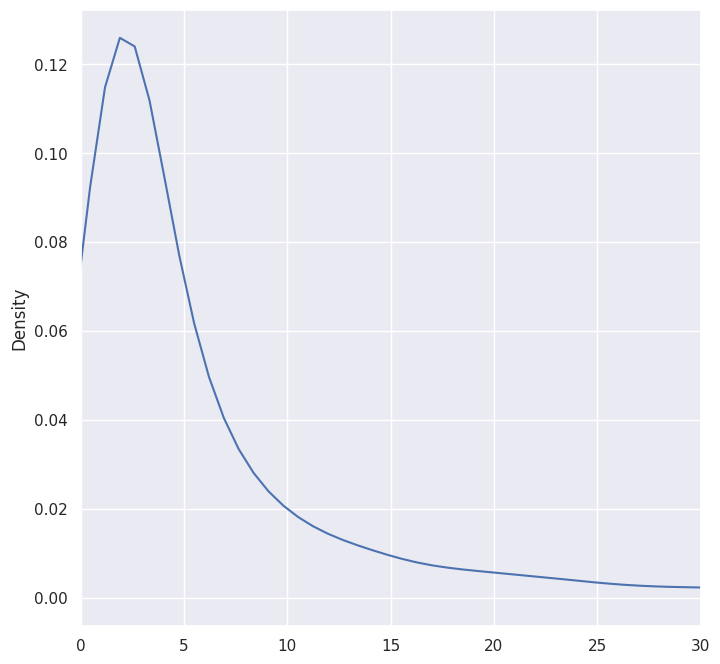

In [ ]:
region_winery_count['count'].plot(kind='kde', xlim=(0,30))

In [ ]:
wineries_per_region = region_winery_count[['region_1', 'winery']].groupby('region_1').count().reset_index()
wineries_per_region.describe()

,winery
count,1332.000000
mean,23.894895
std,62.949285
min,1.000000
25%,2.000000
50%,5.000000
75%,19.000000
max,1080.000000


<Axes: ylabel='Density'>

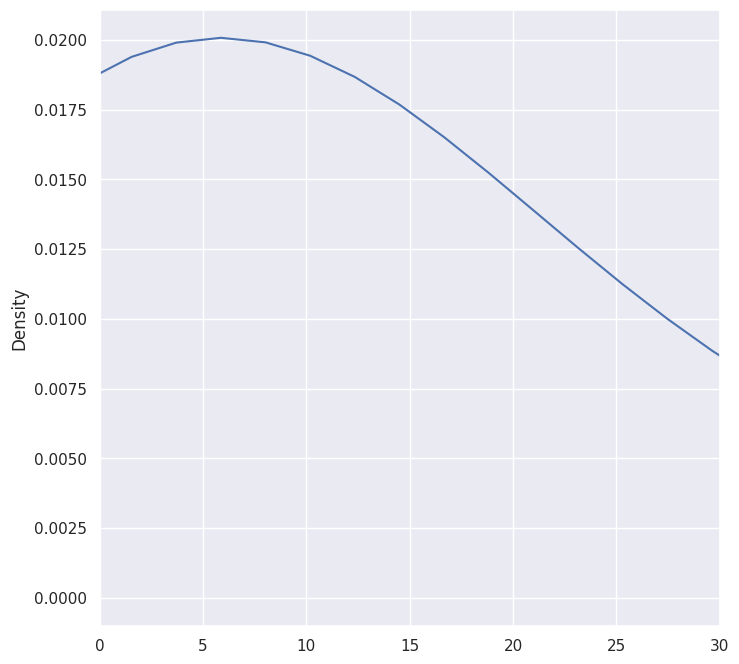

In [ ]:
wineries_per_region['winery'].plot(kind='kde', xlim=(0,30))

In [ ]:
regions_per_winery = region_winery_count[['winery', 'region_1']].groupby('winery').count().reset_index()
regions_per_winery.describe()

,region_1
count,16573.000000
mean,1.920473
std,1.958001
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,48.000000


<Axes: ylabel='Density'>

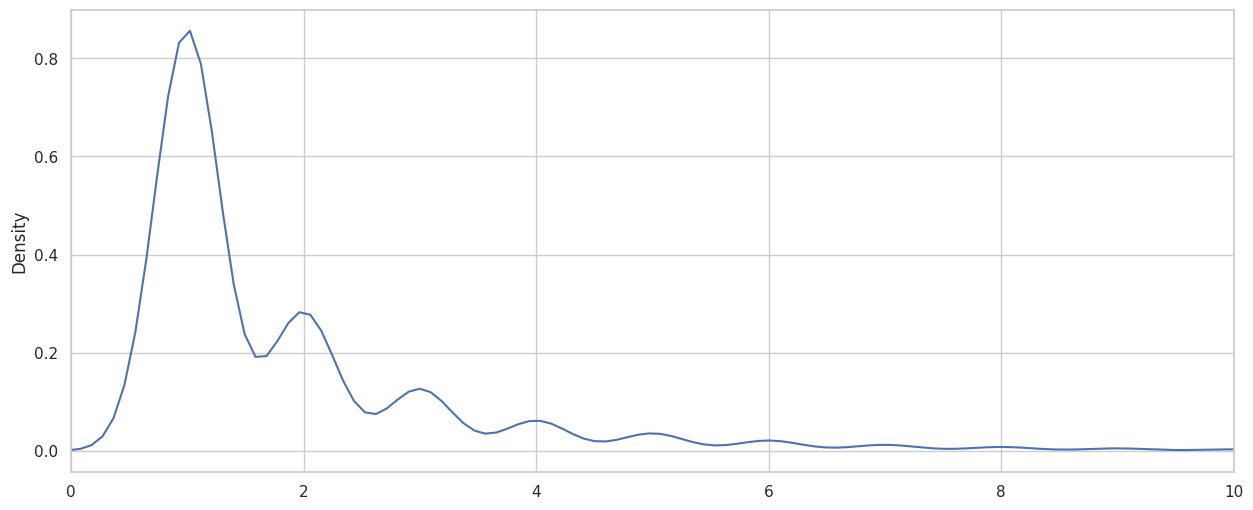

In [ ]:
regions_per_winery['region_1'].plot(kind='kde', xlim=(0,10))

In [ ]:
raw_wine_data_dropCol = raw_wine_data.drop(columns=['Unnamed: 0','designation','province','region_1','region_2','taster_twitter_handle','taster_name'])
raw_wine_data_dropCol.rename(columns={'index':'id'}, inplace=True)

In [ ]:
raw_wine_data_dropCol

,id,country,description,points,price,variety,winery,title
0,0,US,This tremendous 100% varietal wine hails from ...,96,235.0,Cabernet Sauvignon,Heitz,NaN
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Tinta de Toro,Bodega Carmen Rodríguez,NaN
2,2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,Sauvignon Blanc,Macauley,NaN
3,3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Pinot Noir,Ponzi,NaN
4,4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence red blend,Domaine de la Bégude,NaN
...,...,...,...,...,...,...,...,...
280896,280896,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
280897,280897,US,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,Citation,Citation 2004 Pinot Noir (Oregon)
280898,280898,France,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,Domaine Gresser,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
280899,280899,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,Domaine Marcel Deiss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [ ]:
raw_wine_data_dropCol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           280901 non-null  int64  
 1   country      280833 non-null  object 
 2   description  280901 non-null  object 
 3   points       280901 non-null  int64  
 4   price        258210 non-null  float64
 5   variety      280900 non-null  object 
 6   winery       280901 non-null  object 
 7   title        129971 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 17.1+ MB


In [ ]:
# keep the null data in "title"
raw_wine_data_dropCol_dropNa = raw_wine_data_dropCol.dropna(subset=['id', 'country', 'description', 'points', 'price', 'variety', 'winery'])
raw_wine_data_dropCol_dropNa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258145 entries, 0 to 280900
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           258145 non-null  int64  
 1   country      258145 non-null  object 
 2   description  258145 non-null  object 
 3   points       258145 non-null  int64  
 4   price        258145 non-null  float64
 5   variety      258145 non-null  object 
 6   winery       258145 non-null  object 
 7   title        120915 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 17.7+ MB


In [ ]:
# country_top20 list
country_top20 = raw_wine_data_dropCol_dropNa.groupby('country').count().sort_values('title',ascending=False)[0:20].reset_index()['country']
country_top20_list = country_top20.tolist()
country_top20_list

['US',
 'France',
 'Italy',
 'Spain',
 'Portugal',
 'Chile',
 'Argentina',
 'Austria',
 'Australia',
 'Germany',
 'New Zealand',
 'South Africa',
 'Israel',
 'Greece',
 'Canada',
 'Hungary',
 'Bulgaria',
 'Romania',
 'Uruguay',
 'Turkey']

In [ ]:
# get the data from top 20 countries
wine_data_top20countries = raw_wine_data_dropCol_dropNa[raw_wine_data_dropCol_dropNa['country'].isin(country_top20_list)]

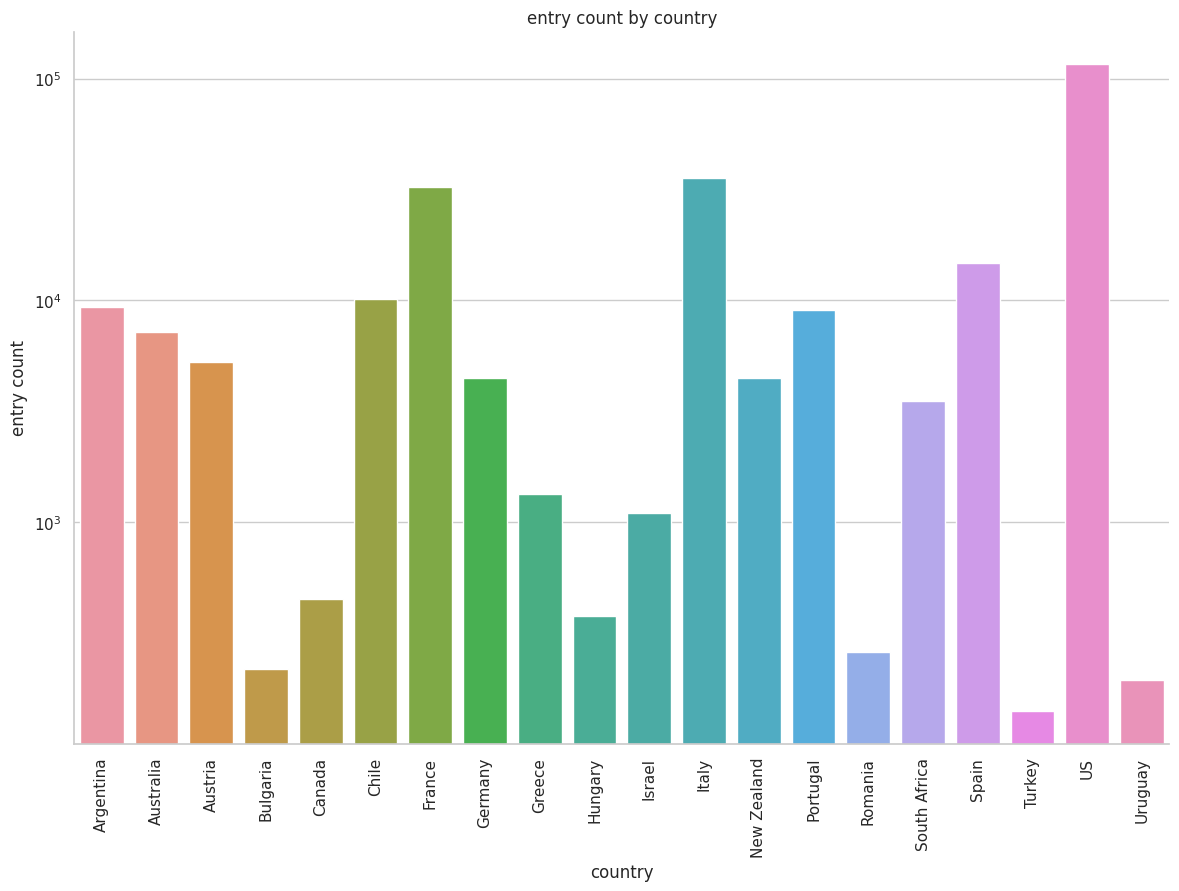

In [ ]:
entry_country_df = wine_data_top20countries[['id','country']].groupby(['country']).count().reset_index()
entry_country_df.rename(columns={'id':'entry count'}, inplace=True)
sns.set(rc={"figure.figsize":(15, 6)}, style="whitegrid")
g3 = sns.catplot(data=entry_country_df, x='country', y='entry count', height=8, aspect=1.5, kind='bar', dodge=False, log=True)
g3.set_xticklabels(rotation=90)
g3.set(title = 'entry count by country')

In [ ]:
# variety_top20 list
variety_top20 = wine_data_top20countries.groupby('variety').count().sort_values('title',ascending=False)[0:20].reset_index()['variety']
variety_top20_list = variety_top20.tolist()

In [ ]:
variety_top20_list

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Riesling',
 'Sauvignon Blanc',
 'Syrah',
 'Rosé',
 'Merlot',
 'Zinfandel',
 'Malbec',
 'Sangiovese',
 'Nebbiolo',
 'Portuguese Red',
 'White Blend',
 'Sparkling Blend',
 'Tempranillo',
 'Rhône-style Red Blend',
 'Pinot Gris']

In [ ]:
wine_data_top20 = wine_data_top20countries[wine_data_top20countries['variety'].isin(variety_top20_list)]
wine_data_top20.head(5)

,id,country,description,points,price,variety,winery,title
0,0,US,This tremendous 100% varietal wine hails from ...,96,235.0,Cabernet Sauvignon,Heitz,NaN
2,2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,Sauvignon Blanc,Macauley,NaN
3,3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Pinot Noir,Ponzi,NaN
8,8,US,This re-named vineyard was formerly bottled as...,95,65.0,Pinot Noir,Bergström,NaN
9,9,US,The producer sources from two blocks of the vi...,95,60.0,Pinot Noir,Blue Farm,NaN


In [ ]:
def extract_year(title):
    if title == np.nan: return np.nan
    digits = re.findall(r'\d{4}', title)
    if len(digits)>0: return digits[0]
    return np.nan

In [ ]:
wine_data_top20  = wine_data_top20.astype({'title':'str'})
wine_data_top20['year'] = wine_data_top20['title'].apply(extract_year)
wine_data_top20['year'] = wine_data_top20['year'].astype('Int64')
wine_data_top20.drop(columns=['title'], inplace=True)

In [ ]:
wine_data_top20.describe()

,id,points,price,year
count,188595.000000,188595.000000,188595.000000,85782.0
mean,141220.229391,88.176648,35.707097,2011.314052
std,81068.939376,3.227824,39.789917,67.095122
min,0.000000,80.000000,4.000000,1000.0
25%,70863.500000,86.000000,17.000000,2009.0
50%,141580.000000,88.000000,26.000000,2011.0
75%,211338.500000,90.000000,44.000000,2013.0
max,280899.000000,100.000000,3300.000000,7200.0


In [ ]:
wine_data_top20[(wine_data_top20['year']<1980)|(wine_data_top20['year']>2022)]

,id,country,description,points,price,variety,winery,year
151269,151269,Spain,"Red in color, with berry and apple aromas, thi...",82,13.0,Sparkling Blend,Cavas Hill,1887
153192,153192,Italy,One of Italy's most interesting and least-know...,87,40.0,Nebbiolo,Salis 1637,1637
154859,154859,Argentina,"Sharp, prickly aromas suggest tart red plum an...",83,7.0,Red Blend,Don Cristobal 1492,1492
156276,156276,US,Tighter blackberry and blueberry fruits meet w...,89,38.0,Cabernet Sauvignon,Foxen 7200,7200
156294,156294,US,"Green melon, lime and lemon flavors ring fresh...",89,16.0,Chardonnay,Hazlitt 1852 Vineyards,1852
...,...,...,...,...,...,...,...,...
275486,275486,US,"Intensely tropical on the nose and palate, thi...",89,12.0,Riesling,Hazlitt 1852 Vineyards,1852
275752,275752,Spain,"This Tempranillo is loaded up front, with berr...",88,12.0,Tempranillo,Bodegas 1898,1898
278044,278044,Argentina,Rather bland and done up with butterscotch and...,83,20.0,Chardonnay,Ikal 1150,1150
279495,279495,US,Yellow cherry and blossom notes soften the bra...,87,17.0,Riesling,Hazlitt 1852 Vineyards,1852


In [ ]:
wine_data_top20['year'] = wine_data_top20['year'].astype('str')
wine_data_top20['year'] = wine_data_top20['year'].apply(lambda x:x if '1980'<x<'2022' else np.nan)
wine_data_top20['year'] = wine_data_top20['year'].astype('Int64')

In [ ]:
wine_data_top20.describe()

,id,points,price,year
count,188595.000000,188595.000000,188595.000000,85676.0
mean,141220.229391,88.176648,35.707097,2010.700721
std,81068.939376,3.227824,39.789917,3.543846
min,0.000000,80.000000,4.000000,1985.0
25%,70863.500000,86.000000,17.000000,2009.0
50%,141580.000000,88.000000,26.000000,2011.0
75%,211338.500000,90.000000,44.000000,2013.0
max,280899.000000,100.000000,3300.000000,2017.0


In [ ]:
wine_data_top20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188595 entries, 0 to 280899
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           188595 non-null  int64  
 1   country      188595 non-null  object 
 2   description  188595 non-null  object 
 3   points       188595 non-null  int64  
 4   price        188595 non-null  float64
 5   variety      188595 non-null  object 
 6   winery       188595 non-null  object 
 7   year         85676 non-null   Int64  
dtypes: Int64(1), float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [ ]:
wine_data_top20.fillna(value={'year':0}, inplace=True)
wine_data_top20['missing_year']=wine_data_top20['year'].apply(lambda x:1 if x==0 else 0)

<ipython-input-99-67276f4a93d3>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  wine_data_top20.fillna(value={'year':0}, inplace=True)


In [ ]:
wine_data_top20.head(5)

,id,country,description,points,price,variety,winery,year,missing_year
0,0,US,This tremendous 100% varietal wine hails from ...,96,235.0,Cabernet Sauvignon,Heitz,0,1
2,2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,Sauvignon Blanc,Macauley,0,1
3,3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Pinot Noir,Ponzi,0,1
8,8,US,This re-named vineyard was formerly bottled as...,95,65.0,Pinot Noir,Bergström,0,1
9,9,US,The producer sources from two blocks of the vi...,95,60.0,Pinot Noir,Blue Farm,0,1


In [ ]:
wine_data_top20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188595 entries, 0 to 280899
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            188595 non-null  int64  
 1   country       188595 non-null  object 
 2   description   188595 non-null  object 
 3   points        188595 non-null  int64  
 4   price         188595 non-null  float64
 5   variety       188595 non-null  object 
 6   winery        188595 non-null  object 
 7   year          188595 non-null  Int64  
 8   missing_year  188595 non-null  int64  
dtypes: Int64(1), float64(1), int64(3), object(4)
memory usage: 14.6+ MB


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# TO-DO: extract description	
description_df = wine_data_top20[['id', 'description']]
description_df['description'] = description_df.apply(lambda x: str(x['description']), axis=1)
description_df

<ipython-input-34-29a9487a0e53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  description_df['description'] = description_df.apply(lambda x: str(x['description']), axis=1)


,id,description
0,0,This tremendous 100% varietal wine hails from ...
2,2,Mac Watson honors the memory of a wine once ma...
3,3,"This spent 20 months in 30% new French oak, an..."
8,8,This re-named vineyard was formerly bottled as...
9,9,The producer sources from two blocks of the vi...
...,...,...
280893,280893,"A bouquet of black cherry, tart cranberry and ..."
280895,280895,"While it's rich, this beautiful dry wine also ..."
280896,280896,Notes of honeysuckle and cantaloupe sweeten th...
280897,280897,Citation is given as much as a decade of bottl...


In [ ]:
# Convert to dataframe & tokenize list 
# return a tokenized list of words, removing stop words and checking for alphabets
# in description_df, create a new column called 'tokenized' which contains the tokens from description.

from nltk.tokenize import word_tokenize 
def tokenize_content(content):
  word_list = word_tokenize(content)
  word_list = list(map(lambda x: x.lower(), word_list))
  # print(word_list)
  word_list_final = []
  count = 0;
  # print(len(word_list))
  while count < len(word_list):
    # print(count)
    word = word_list[count]
    # print(word_list[count])
    if word in stopwords:
      count = count + 1
      continue
    if word.isalpha() == True:
      word_list_final.append(word)
    count = count + 1
  # print(word_list_final)
  return word_list_final

  
#TODO: Apply the function to description
description_df['tokenized'] = description_df.apply(lambda x: tokenize_content(x['description']), axis=1)
description_df.info()

<ipython-input-35-9a36d5dc45e3>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  description_df['tokenized'] = description_df.apply(lambda x: tokenize_content(x['description']), axis=1)


,id,description,tokenized
0,0,This tremendous 100% varietal wine hails from ...,"[tremendous, varietal, wine, hails, oakville, ..."
2,2,Mac Watson honors the memory of a wine once ma...,"[mac, watson, honors, memory, wine, made, moth..."
3,3,"This spent 20 months in 30% new French oak, an...","[spent, months, new, french, oak, incorporates..."
8,8,This re-named vineyard was formerly bottled as...,"[vineyard, formerly, bottled, delancellotti, f..."
9,9,The producer sources from two blocks of the vi...,"[producer, sources, two, blocks, vineyard, hig..."
...,...,...,...
280893,280893,"A bouquet of black cherry, tart cranberry and ...","[bouquet, black, cherry, tart, cranberry, clov..."
280895,280895,"While it's rich, this beautiful dry wine also ...","[rich, beautiful, dry, wine, also, offers, con..."
280896,280896,Notes of honeysuckle and cantaloupe sweeten th...,"[notes, honeysuckle, cantaloupe, sweeten, deli..."
280897,280897,Citation is given as much as a decade of bottl...,"[citation, given, much, decade, bottle, age, p..."


In [ ]:
# nltk pos tag the tokenized words
# from nltk import pos_tag
description_df['tagged'] = description_df.apply(lambda x: nltk.pos_tag(x['tokenized']), axis=1)
description_df.head(5)

<ipython-input-36-987ed6d54807>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  description_df['tagged'] = description_df.apply(lambda x: nltk.pos_tag(x['tokenized']), axis=1)


,id,description,tokenized,tagged
0,0,This tremendous 100% varietal wine hails from ...,"[tremendous, varietal, wine, hails, oakville, ...","[(tremendous, JJ), (varietal, JJ), (wine, NN),..."
2,2,Mac Watson honors the memory of a wine once ma...,"[mac, watson, honors, memory, wine, made, moth...","[(mac, NN), (watson, NN), (honors, NNS), (memo..."
3,3,"This spent 20 months in 30% new French oak, an...","[spent, months, new, french, oak, incorporates...","[(spent, JJ), (months, NNS), (new, JJ), (frenc..."
8,8,This re-named vineyard was formerly bottled as...,"[vineyard, formerly, bottled, delancellotti, f...","[(vineyard, RB), (formerly, RB), (bottled, VBN..."
9,9,The producer sources from two blocks of the vi...,"[producer, sources, two, blocks, vineyard, hig...","[(producer, NN), (sources, NNS), (two, CD), (b..."


In [ ]:
# Sentiment analysis
sia = SentimentIntensityAnalyzer()
def retrieve_sentiment(content):
  return sia.polarity_scores(content)['compound']

description_df['sentiment'] = description_df.apply(lambda x: retrieve_sentiment(x['description']), axis=1)
description_df.head(5)

<ipython-input-37-d56e73621c11>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  description_df['sentiment'] = description_df.apply(lambda x: retrieve_sentiment(x['description']), axis=1)


,id,description,tokenized,tagged,sentiment
0,0,This tremendous 100% varietal wine hails from ...,"[tremendous, varietal, wine, hails, oakville, ...","[(tremendous, JJ), (varietal, JJ), (wine, NN),...",0.9287
2,2,Mac Watson honors the memory of a wine once ma...,"[mac, watson, honors, memory, wine, made, moth...","[(mac, NN), (watson, NN), (honors, NNS), (memo...",0.8070
3,3,"This spent 20 months in 30% new French oak, an...","[spent, months, new, french, oak, incorporates...","[(spent, JJ), (months, NNS), (new, JJ), (frenc...",0.2023
8,8,This re-named vineyard was formerly bottled as...,"[vineyard, formerly, bottled, delancellotti, f...","[(vineyard, RB), (formerly, RB), (bottled, VBN...",0.4927
9,9,The producer sources from two blocks of the vi...,"[producer, sources, two, blocks, vineyard, hig...","[(producer, NN), (sources, NNS), (two, CD), (b...",0.4588
...,...,...,...,...,...
280893,280893,"A bouquet of black cherry, tart cranberry and ...","[bouquet, black, cherry, tart, cranberry, clov...","[(bouquet, JJ), (black, JJ), (cherry, NN), (ta...",0.7326
280895,280895,"While it's rich, this beautiful dry wine also ...","[rich, beautiful, dry, wine, also, offers, con...","[(rich, JJ), (beautiful, JJ), (dry, JJ), (wine...",0.8564
280896,280896,Notes of honeysuckle and cantaloupe sweeten th...,"[notes, honeysuckle, cantaloupe, sweeten, deli...","[(notes, NNS), (honeysuckle, VBP), (cantaloupe...",0.7331
280897,280897,Citation is given as much as a decade of bottl...,"[citation, given, much, decade, bottle, age, p...","[(citation, NN), (given, VBN), (much, RB), (de...",0.5267


In [ ]:
wine_df = wine_data_top20[['id', 'country', 'points', 'price', 'variety', 'year', 'missing_year', 'winery']].merge(description_df[['id','sentiment']], on='id',how='left')

In [ ]:
wine_df.head(5)

,id,country,points,price,variety,year,missing_year,winery,sentiment
0,0,US,96,235.0,Cabernet Sauvignon,0,1,Heitz,0.9287
1,2,US,96,90.0,Sauvignon Blanc,0,1,Macauley,0.8070
2,3,US,96,65.0,Pinot Noir,0,1,Ponzi,0.2023
3,8,US,95,65.0,Pinot Noir,0,1,Bergström,0.4927
4,9,US,95,60.0,Pinot Noir,0,1,Blue Farm,0.4588


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188595 entries, 0 to 188594
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            188595 non-null  int64  
 1   country       188595 non-null  object 
 2   points        188595 non-null  int64  
 3   price         188595 non-null  float64
 4   variety       188595 non-null  object 
 5   year          188595 non-null  Int64  
 6   missing_year  188595 non-null  int64  
 7   winery        188595 non-null  object 
 8   sentiment     188595 non-null  float64
dtypes: Int64(1), float64(2), int64(3), object(3)
memory usage: 14.6+ MB


In [ ]:
# # select adjective words for prediction

description_df['adjectives'] = description_df.apply(lambda x: set([word for word,tag in x['tagged'] if tag[0] in "JJ"]), axis=1)
description_df.head(5)

# from textblob import TextBlob
# def get_adjectives(text):
#     blob = TextBlob(str(text))
#     return set([ word for (word,tag) in blob.tags if tag == "JJ"])

# description_df['adjectives'] = description_df['description'].apply(get_adjectives)
# description_df

<ipython-input-39-5d7c07e27df3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  description_df['adjectives'] = description_df.apply(lambda x: set([word for word,tag in x['tagged'] if tag[0] in "JJ"]), axis=1)


,id,description,tokenized,tagged,sentiment,adjectives
0,0,This tremendous 100% varietal wine hails from ...,"[tremendous, varietal, wine, hails, oakville, ...","[(tremendous, JJ), (varietal, JJ), (wine, NN),...",0.9287,"{subtle, start, fine, finish, varietal, elegan..."
2,2,Mac Watson honors the memory of a wine once ma...,"[mac, watson, honors, memory, wine, made, moth...","[(mac, NN), (watson, NN), (honors, NNS), (memo...",0.8070,"{hazelnut, residual, delicious, complex, pear,..."
3,3,"This spent 20 months in 30% new French oak, an...","[spent, months, new, french, oak, incorporates...","[(spent, JJ), (months, NNS), (new, JJ), (frenc...",0.2023,"{aurora, aromatic, dark, spent, sheen, french,..."
8,8,This re-named vineyard was formerly bottled as...,"[vineyard, formerly, bottled, delancellotti, f...","[(vineyard, RB), (formerly, RB), (bottled, VBN...",0.4927,"{graphite, delancellotti, black, chunky, enjoy..."
9,9,The producer sources from two blocks of the vi...,"[producer, sources, two, blocks, vineyard, hig...","[(producer, NN), (sources, NNS), (two, CD), (b...",0.4588,"{lush, silky, high, fleshy, considerable, pres..."


In [ ]:
# TODO: flatten adjectives set
adjective_set_list = description_df["adjectives"].values.tolist()
adjective_list = []
for adjective_subset in adjective_set_list:
  for adj in adjective_subset:
    adjective_list.append(adj)
# adjective_list

In [ ]:
#  Save the result as a list of (word, count) tuples, in descending order of count.
cnt = Counter()
for word in adjective_list:
  cnt[word] += 1

word_frequency_list = cnt.most_common()
# word_frequency_list

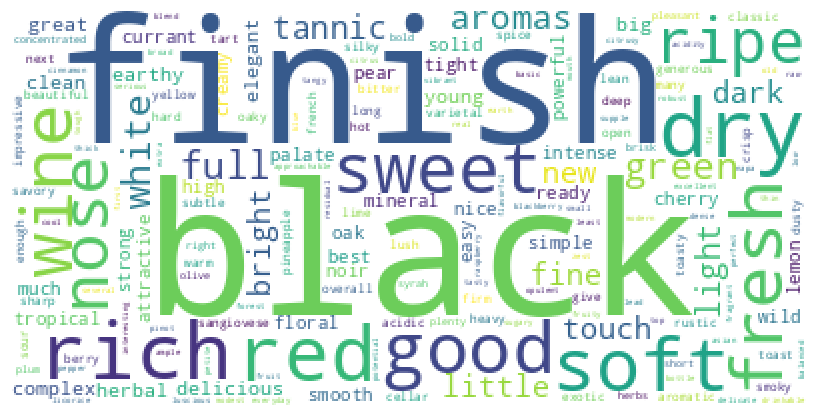

In [ ]:
# generate wordCloud
wordcloud = WordCloud(background_color ='white').generate_from_frequencies(cnt)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
winery_points = wine_df[['winery','points']].groupby('winery').mean().round(2).reset_index()
winery_points.rename(columns={'points':'winery_point'},inplace=True)

In [ ]:
winery_points.head(5)

,winery,winery_point
0,1+1=3,84.88
1,10 Knots,84.92
2,100 Percent Wine,86.50
3,1000 Stories,90.33
4,1040FU,82.00


In [ ]:
# Merge with wine_df, add one more column winery_point
wine_df = wine_df.merge(winery_points, how="left", on='winery')
wine_df.drop(columns=['winery'],inplace=True)

In [ ]:
wine_df.head(5)

,id,country,points,price,variety,year,missing_year,sentiment,winery_point
0,0,US,96,235.0,Cabernet Sauvignon,0,1,0.9287,93.67
1,2,US,96,90.0,Sauvignon Blanc,0,1,0.8070,93.67
2,3,US,96,65.0,Pinot Noir,0,1,0.2023,91.26
3,8,US,95,65.0,Pinot Noir,0,1,0.4927,92.46
4,9,US,95,60.0,Pinot Noir,0,1,0.4588,92.60


In [ ]:
price_year_variety_df = wine_df[['price', 'variety', 'year']]
price_year_variety_df = price_year_variety_df[price_year_variety_df['year']>1980]
price_year_variety_df = price_year_variety_df[price_year_variety_df['variety'].isin(['Pinot Noir','Chardonnay','Cabernet Sauvignon','Riesling','Sauvignon Blanc','Syrah','Merlot','Zinfandel','Malbec'])]
price_year_variety_df['year']=price_year_variety_df['year'].astype('int64')
price_year_variety_df = price_year_variety_df.groupby(['variety', 'year']).mean().reset_index()
price_year_variety_df.rename(columns={'price':'average price','year':'production year'},inplace=True)

[Text(0.5, 1.0, 'average price trend by production year')]

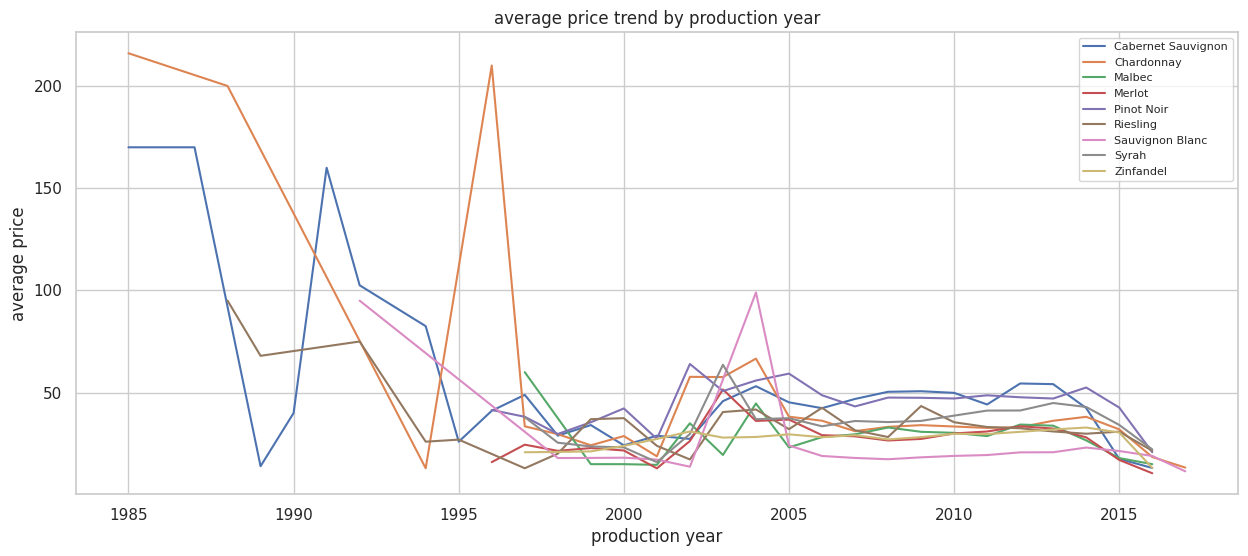

In [ ]:
sns.set(rc={"figure.figsize":(15, 6)}, style="whitegrid")
g1 = sns.lineplot(data=price_year_variety_df, x='production year', y='average price', hue='variety')
g1.legend(fontsize=8)
g1.set(title = 'average price trend by production year')

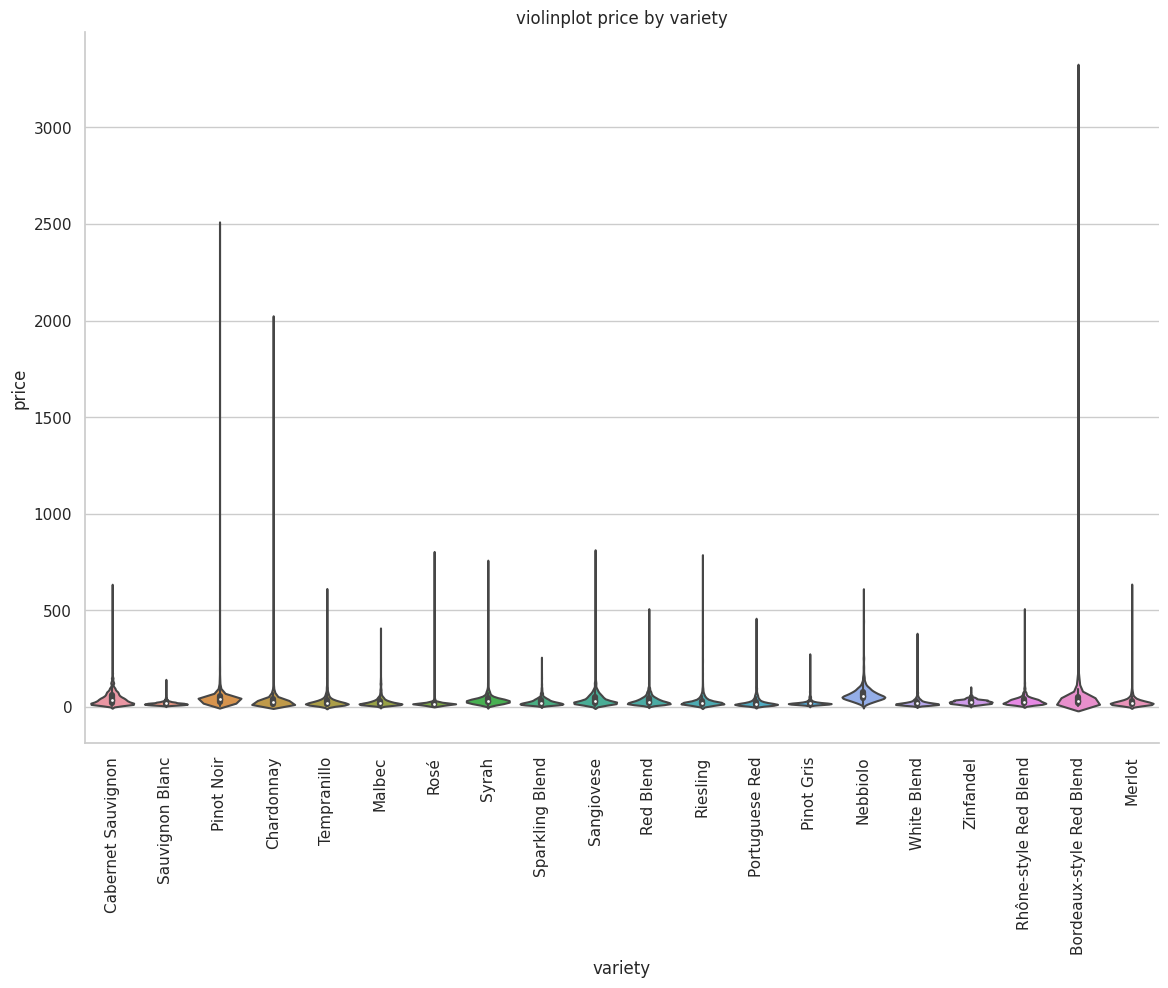

In [ ]:
price_variety_df = wine_df[['price', 'variety']]
sns.set(rc={"figure.figsize":(15, 6)}, style="whitegrid")
g2 = sns.catplot(data=price_variety_df, x='variety', y='price', hue='variety', height=8, aspect=1.5, kind='violin', dodge=False)
g2.set_xticklabels(rotation=90)
g2.set(title = 'violinplot price by variety')

<ipython-input-58-311de5dd2c23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entry_variety_df.rename(columns={'id':'entry count'}, inplace=True)


<Axes: >

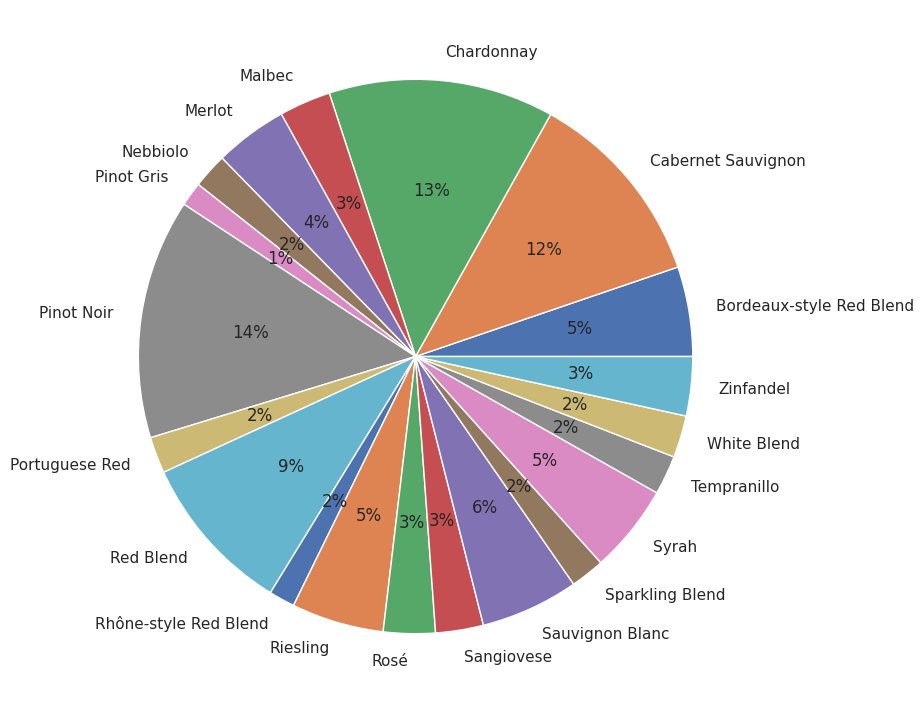

In [ ]:
entry_variety_df = wine_df[['id','variety']]
entry_variety_df.rename(columns={'id':'entry count'}, inplace=True)
entry_variety_df.groupby(['variety']).count().plot(kind='pie', y='entry count', ylabel='', autopct='%1.0f%%', figsize=(18,9), legend=False)

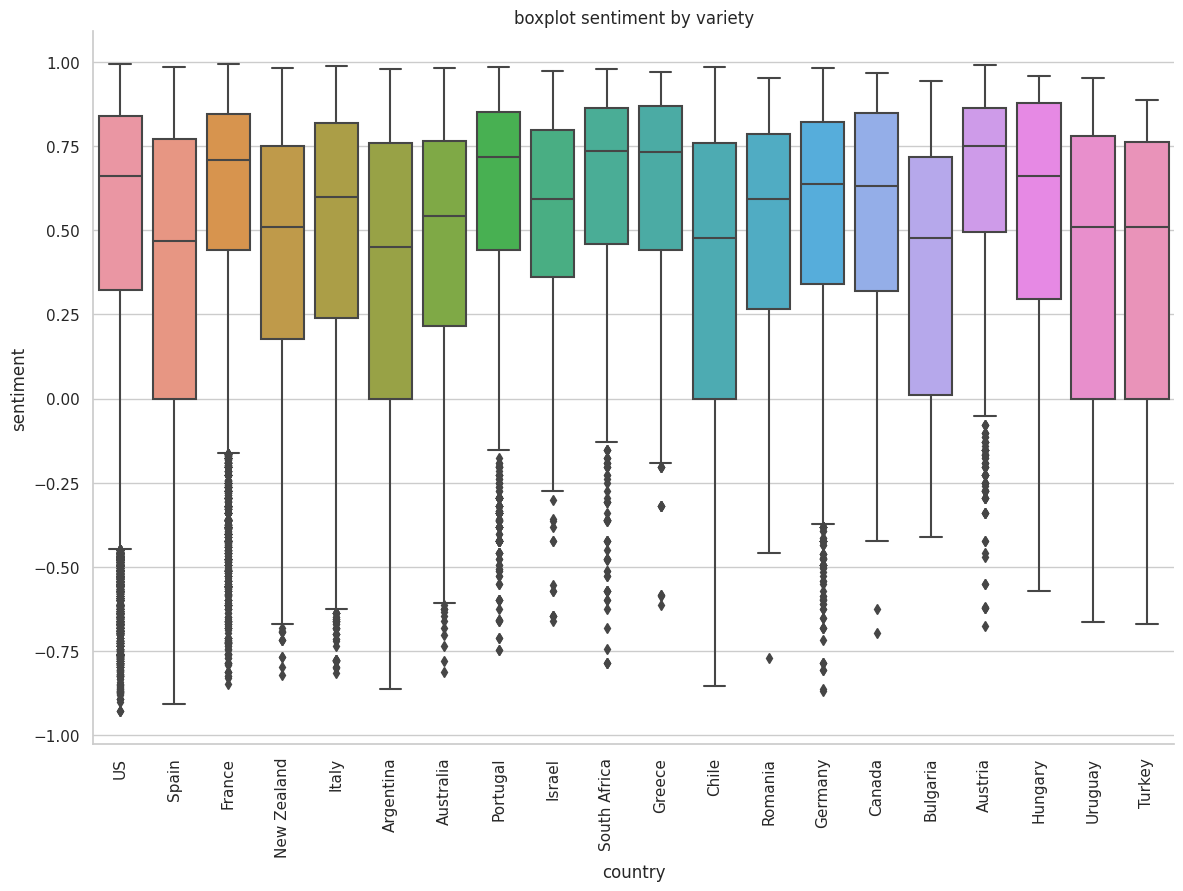

In [ ]:
sentiment_country_df = wine_df[['sentiment','country']]
sns.set(rc={"figure.figsize":(15, 6)}, style="whitegrid")
g2 = sns.catplot(data=sentiment_country_df, x='country', y='sentiment', hue='country', height=8, aspect=1.5, kind='box', dodge=False)
g2.set_xticklabels(rotation=90)
g2.set(title = 'boxplot sentiment by variety')

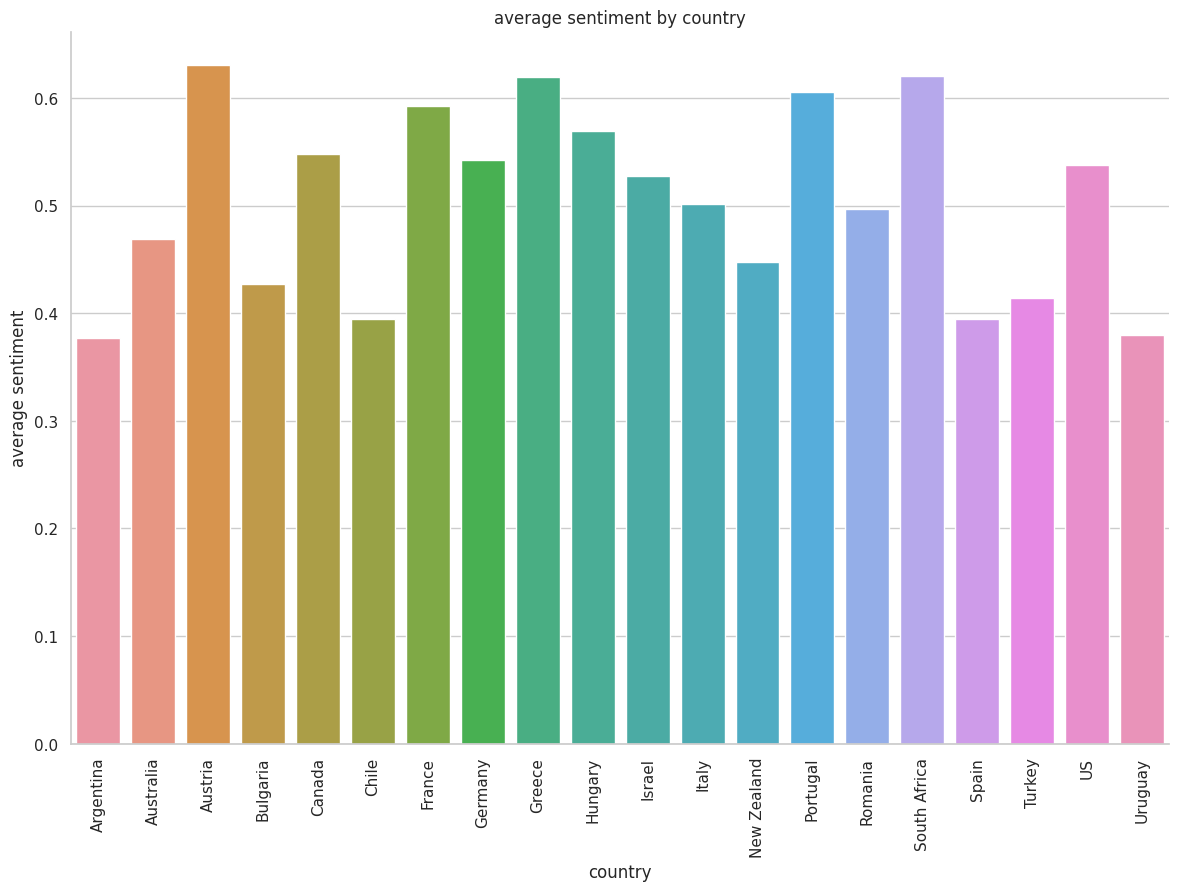

In [ ]:
sentiment_country_df = wine_df[['sentiment','country']].groupby(['country']).mean().reset_index()
sentiment_country_df.rename(columns={'sentiment':'average sentiment'}, inplace=True)
sns.set(rc={"figure.figsize":(15, 6)}, style="whitegrid")
g3 = sns.catplot(data=sentiment_country_df, x='country', y='average sentiment', height=8, aspect=1.5, kind='bar', dodge=False)
g3.set_xticklabels(rotation=90)
g3.set(title = 'average sentiment by country')

<Axes: ylabel='Density'>

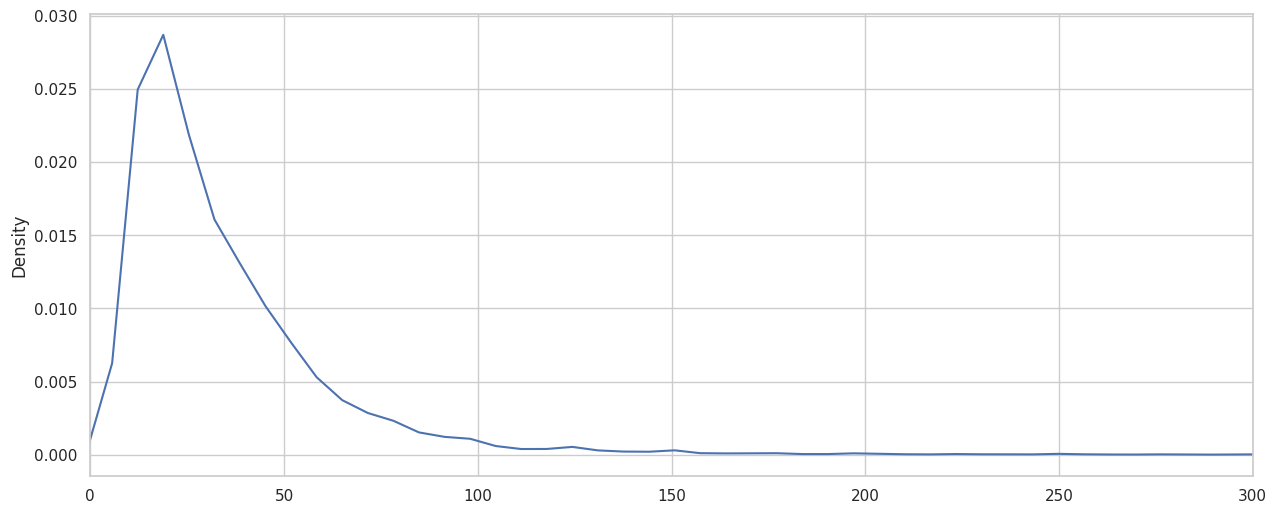

In [ ]:
wine_df['price'].plot(kind='kde', xlim=(0,300))

In [ ]:
wine_df.to_csv('/content/drive/MyDrive/wine_clean.csv', index=False)

# PART 2: Regression Model Evaluation and Hyperparameter Tuning




In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np

# drive mount
from google.colab import drive
drive.mount('/content/drive')

# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# download clean data for modeling 
wine_df  = pd.read_csv('/content/drive/MyDrive/wine_clean.csv')

wine_df

,id,country,points,price,variety,year,missing_year,sentiment,winery_point
0,0,US,96,235.0,Cabernet Sauvignon,0,1,0.9287,93.67
1,2,US,96,90.0,Sauvignon Blanc,0,1,0.8070,93.67
2,3,US,96,65.0,Pinot Noir,0,1,0.2023,91.26
3,8,US,95,65.0,Pinot Noir,0,1,0.4927,92.46
4,9,US,95,60.0,Pinot Noir,0,1,0.4588,92.60
...,...,...,...,...,...,...,...,...,...
188590,280893,Israel,90,20.0,Cabernet Sauvignon,2012,0,0.7326,89.95
188591,280895,France,90,28.0,Pinot Gris,2013,0,0.8564,90.03
188592,280896,Germany,90,28.0,Riesling,2013,0,0.7331,89.85
188593,280897,US,90,75.0,Pinot Noir,2004,0,0.5267,88.80


In [ ]:
# TO-DO: One-hot encode on imputed wine_df
wine_df  = pd.get_dummies(data=wine_df, columns=['country','variety'])
wine_df.head(5)

,id,points,price,year,missing_year,sentiment,winery_point,country_Argentina,country_Australia,country_Austria,...,variety_Rhône-style Red Blend,variety_Riesling,variety_Rosé,variety_Sangiovese,variety_Sauvignon Blanc,variety_Sparkling Blend,variety_Syrah,variety_Tempranillo,variety_White Blend,variety_Zinfandel
0,0,96,235.0,0,1,0.9287,93.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,96,90.0,0,1,0.8070,93.67,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,96,65.0,0,1,0.2023,91.26,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,95,65.0,0,1,0.4927,92.46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,95,60.0,0,1,0.4588,92.60,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def wineClass(x):
    if x <= 10: return 0
    if 10 < x <= 15: return 1
    if 15 < x <= 20: return 2
    if 20 < x <= 30: return 3
    if 30 < x <= 50: return 4
    if 50 < x <= 100: return 5
    if 100 < x <= 200: return 6
    return 7

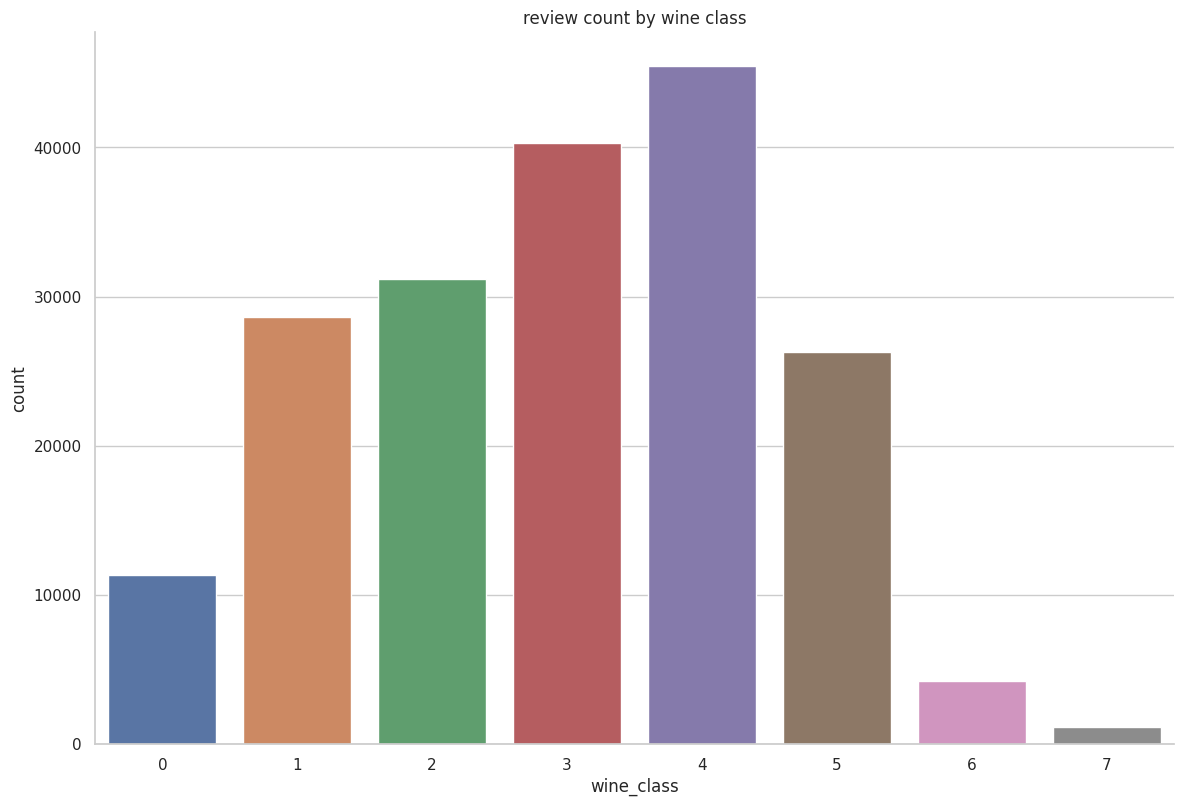

In [ ]:
wine_df['wine_class'] = wine_df['price'].apply(wineClass)
wine_class_count = wine_df[['wine_class','id']].groupby('wine_class').count().reset_index()
wine_class_count.rename(columns={'id':'count'},inplace=True)
sns.set(style="whitegrid")
g4 = sns.catplot(data=wine_class_count, x='wine_class', y='count', height=8, aspect=1.5, kind='bar', dodge=False)
g4.set(title = 'review count by wine class')

In [ ]:
price_sorted_df = wine_df[['price']].sort_values('price')
line_number = len(price_sorted_df.index) // 8
indices_selected = [line_number*m for m in range(1,8)]
price_sorted_df.iloc[indices_selected]

,price
82827,13.0
102933,17.0
46536,20.0
176834,26.0
157640,34.0
112879,44.0
166491,60.0


In [ ]:
def balancedClass(x):
    if x <= 13: return 0
    if 13 < x <= 17: return 1
    if 17 < x <= 20: return 2
    if 20 < x <= 26: return 3
    if 26 < x <= 34: return 4
    if 34 < x <= 44: return 5
    if 44 < x <= 60: return 6
    return 7

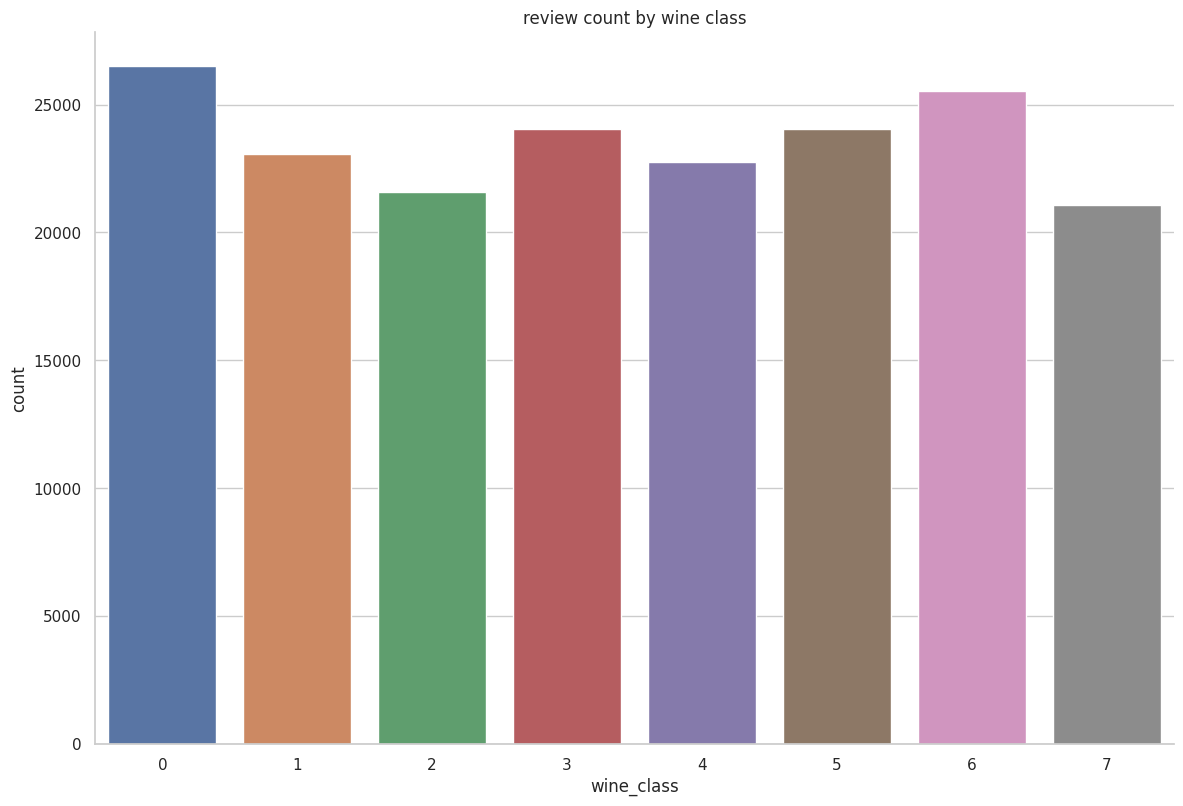

In [ ]:
wine_df['wine_class'] = wine_df['price'].apply(balancedClass)
wine_class_count = wine_df[['wine_class','id']].groupby('wine_class').count().reset_index()
wine_class_count.rename(columns={'id':'count'},inplace=True)
sns.set(style="whitegrid")
g4 = sns.catplot(data=wine_class_count, x='wine_class', y='count', height=8, aspect=1.5, kind='bar', dodge=False)
g4.set(title = 'review count by wine class')

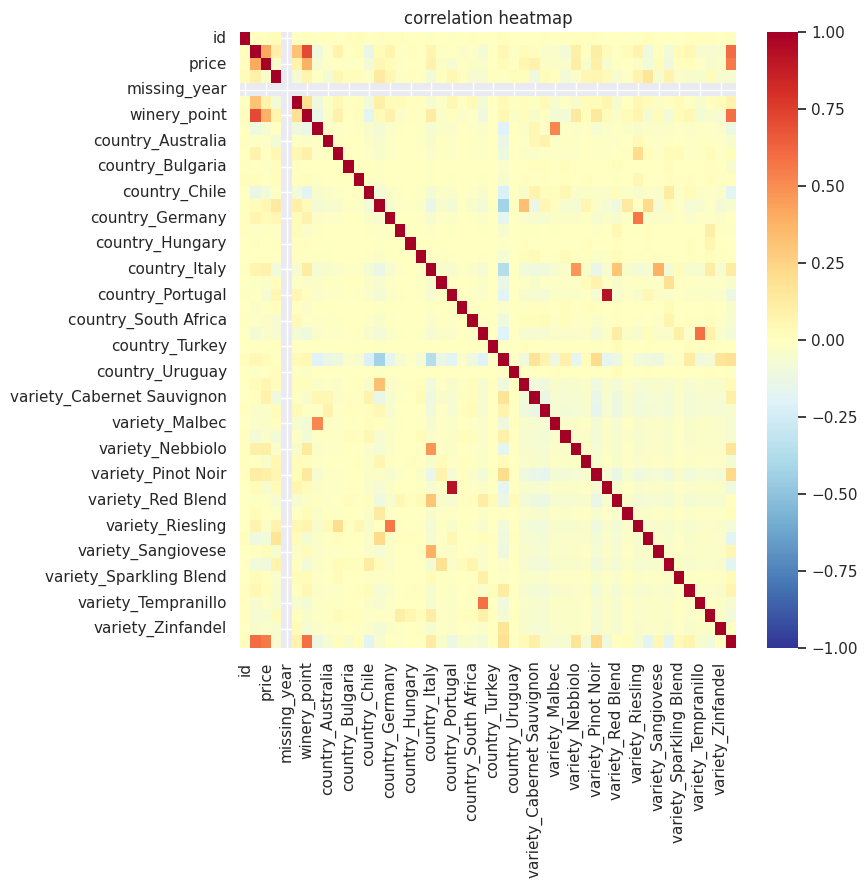

In [ ]:
numeric_df = wine_df
numeric_df = numeric_df[numeric_df['year']>0]
corr_matrix = numeric_df.corr()
sns.set(rc={"figure.figsize":(8, 8)})
ax = sns.heatmap(corr_matrix, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)
ax.set(title='correlation heatmap')
plt.show()

In [ ]:
#split train and test dataset
# Preparing data for train set and test set
X = wine_df.drop(columns=['id', 'price', 'wine_class'])
y = wine_df['wine_class']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2)

# step 1: Trainning model by using all variables
clf = LinearRegression()
clf.fit(X_train1,y_train1)

# step 2. Testing model 
y_pred1 = clf.predict(X_test1)

# step 3: evaluate model 
score = clf.score(X_test1, y_test1)
score

0.5432174149660702

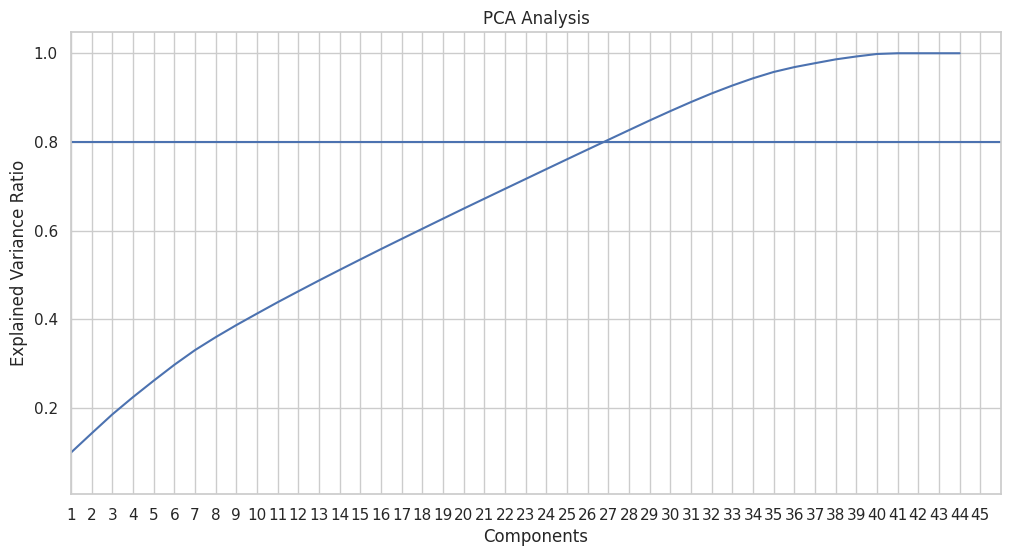

In [ ]:
# PCA 

# Preparing data for train set and test set
X = wine_df.drop(columns=['id', 'price', 'wine_class'])
y = wine_df['wine_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Intermediate step to address scale-invariance
x_train_scale =  StandardScaler().fit_transform(X_train)
x_test_scale =  StandardScaler().fit_transform(X_test)

# Instantiate and Fit PCA
pca = PCA(n_components = 45)
x_train_pca = pca.fit_transform(x_train_scale)
x_test_pca = pca.transform(x_test_scale)

#  Save the explained variance ratios into variable called "explained_variance_ratios"
np.set_printoptions(suppress=True)
explained_variance_ratios = pca.explained_variance_ratio_

# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(explained_variance_ratios)

# Plot
plt.figure(figsize=(12,6))
plt.plot(cum_evr)
# Aesthetics 
plt.title('PCA Analysis')
plt.xlabel('Components') 
plt.ylabel('Explained Variance Ratio')
plt.axhline(0.8)
plt.xlim(1,46)  # x range
x=range(1,46,1) 
plt.xticks(x)    # setting for xticks
plt.show()


In [ ]:
# Final PCA: reduce dimensionality to 28 components

# 1: Preparing data for train set and test set
X = wine_df.drop(columns=['id', 'price', 'wine_class'])
y = wine_df['wine_class']

# 2. scale training and testing data
scaler= StandardScaler().fit(X)
X_scale = scaler.transform(X)
X_train_scale, X_test_scale, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

# 3. transfer to PCA 
pca = PCA(n_components = 28)
pca = pca.fit(X_scale)

X_train_pca = pca.transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)

In [ ]:
# step 1: Preparing data for train set and test set

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# step 2. Trainning model by using all independent variable
clf = LinearRegression()
clf.fit(X_train_pca,y_train)

# step 3. Testing model 
y_pred = clf.predict(X_test_pca)

# step 4: evaluate model 
regression_score = clf.score(X_test_pca,y_test)
regression_score 

0.4945988081842224

In [ ]:
#import data for Regulazation Model
y_batch = y.to_numpy()
y_batch = y_batch[:, None]

sc = MinMaxScaler()
X_batch=X_scale

print("Features shape {}".format(X_batch.shape))
print("Label shape {}".format(y_batch.shape))

Features shape (188595, 45)
Label shape (188595, 1)


In [ ]:
def train_linear_model_with_diff_params(model_type, alpha_values, X_scaled, y, test_size, model_list= None, train_accuracy_list= None, test_accuracy_list=None):
  # initialize the result 
  if train_accuracy_list == None:
    train_accuracy_list = [];
  if test_accuracy_list == None:
    test_accuracy_list = [];

  if model_list == None:
    model_list = [];

  for spec_alpha in alpha_values: 
    # split the training and testing dataset 
    (X_train, X_test, y_train, y_test) = train_test_split(X_scaled, y, test_size= 0.8, random_state=42)
    if model_type == 'Ridge':
      model = Ridge(alpha=spec_alpha, max_iter= 100000);
    if model_type == 'Lasso':
      model = Lasso(alpha= spec_alpha, max_iter= 100000);
    
    model.fit(X_train, y_train);
    model_list.append(model); 
    train_accuracy = model.score(X_train, y_train);
    test_accuracy = model.score(X_test, y_test); 
    train_accuracy_list.append(train_accuracy);
    test_accuracy_list.append(test_accuracy);
    # format the result for better result display 
    spec_alpha = format(spec_alpha, '.6f')
    train_accuracy = format(train_accuracy, '.13f')
    test_accuracy = format(test_accuracy, '.13f')
    print("{} Model with alpha {} Performance || Train_accuracy:{}, Test_accuracy:{}".format(model_type, spec_alpha, train_accuracy, test_accuracy));
  return model_list, train_accuracy_list, test_accuracy_list;

In [ ]:
alpha_values_list = [5,4,3,2,1,0.5, 0.1, 0.05, 0.01, 0.005, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5,
                     5e-6, 1e-6, 5e-7, 1e-7];

ridge_model_list, ridge_train_accur_list, ridge_test_accur_list = train_linear_model_with_diff_params(model_type='Ridge', 
                                                                                                        alpha_values= alpha_values_list, 
                                                                                                        X_scaled= X_batch, 
                                                                                                        y= y_batch, 
                                                                                                        test_size = 0.2)

Ridge Model with alpha 5.000000 Performance || Train_accuracy:0.5414537718543, Test_accuracy:0.5403412120488
Ridge Model with alpha 4.000000 Performance || Train_accuracy:0.5414792095731, Test_accuracy:0.5403663233269
Ridge Model with alpha 3.000000 Performance || Train_accuracy:0.5415207694443, Test_accuracy:0.5404073661415
Ridge Model with alpha 2.000000 Performance || Train_accuracy:0.5416008780138, Test_accuracy:0.5404865020773
Ridge Model with alpha 1.000000 Performance || Train_accuracy:0.5418193246634, Test_accuracy:0.5407023427907
Ridge Model with alpha 0.500000 Performance || Train_accuracy:0.5421757818141, Test_accuracy:0.5410545843711
Ridge Model with alpha 0.100000 Performance || Train_accuracy:0.5433611715726, Test_accuracy:0.5422261111940
Ridge Model with alpha 0.050000 Performance || Train_accuracy:0.5437254643425, Test_accuracy:0.5425862428921
Ridge Model with alpha 0.010000 Performance || Train_accuracy:0.5439919971020, Test_accuracy:0.5428499138059
Ridge Model with al

In [ ]:
alpha_values_list = [5,4,3,2,1,0.5, 0.1, 0.05, 0.01, 0.005, 1e-3, 5e-4];
lasso_model_list, lasso_train_accur_list, lasso_test_accur_list = train_linear_model_with_diff_params(model_type='Lasso', 
                                                                                                        alpha_values= alpha_values_list, 
                                                                                                        X_scaled= X_batch, 
                                                                                                        y= y_batch, 
                                                                                                        test_size = 0.2)

Lasso Model with alpha 5.000000 Performance || Train_accuracy:0.0000000000000, Test_accuracy:-0.0000091945687
Lasso Model with alpha 4.000000 Performance || Train_accuracy:0.0000000000000, Test_accuracy:-0.0000091945687
Lasso Model with alpha 3.000000 Performance || Train_accuracy:0.0000000000000, Test_accuracy:-0.0000091945687
Lasso Model with alpha 2.000000 Performance || Train_accuracy:0.0000000000000, Test_accuracy:-0.0000091945687
Lasso Model with alpha 1.000000 Performance || Train_accuracy:0.2036676986244, Test_accuracy:0.2025858337296
Lasso Model with alpha 0.500000 Performance || Train_accuracy:0.3681199369266, Test_accuracy:0.3659825173413
Lasso Model with alpha 0.100000 Performance || Train_accuracy:0.5071674999205, Test_accuracy:0.5050455925013
Lasso Model with alpha 0.050000 Performance || Train_accuracy:0.5285868076787, Test_accuracy:0.5270131783614
Lasso Model with alpha 0.010000 Performance || Train_accuracy:0.5405880781324, Test_accuracy:0.5394700835063
Lasso Model wit

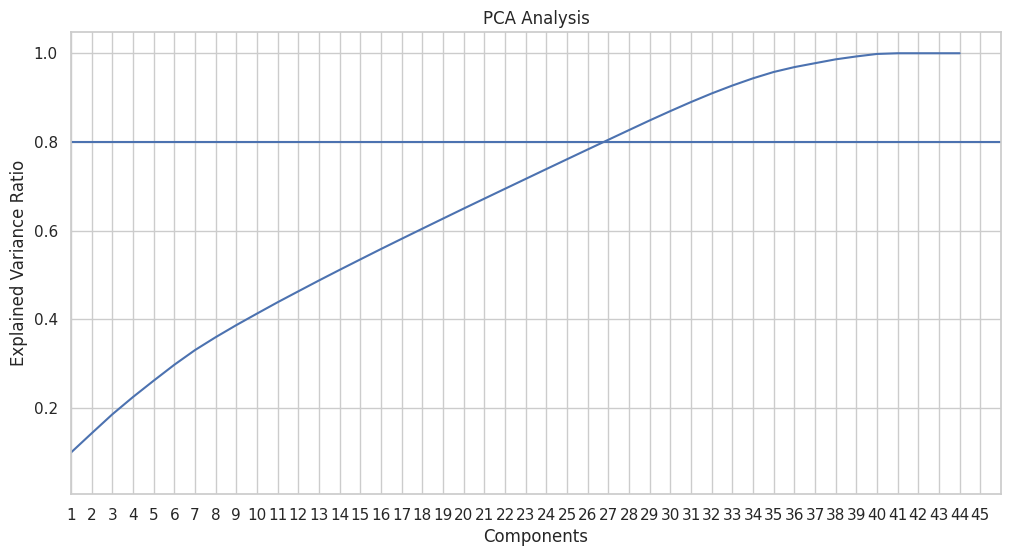

In [ ]:
# PCA 

# Preparing data for train set and test set
X = wine_df.drop(columns=['id', 'price', 'wine_class'])
y = wine_df['wine_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Intermediate step to address scale-invariance
x_train_scale =  StandardScaler().fit_transform(X_train)
x_test_scale =  StandardScaler().fit_transform(X_test)

# Instantiate and Fit PCA
pca = PCA(n_components = 45)
x_train_pca = pca.fit_transform(x_train_scale)
x_test_pca = pca.transform(x_test_scale)

#  Save the explained variance ratios into variable called "explained_variance_ratios"
np.set_printoptions(suppress=True)
explained_variance_ratios = pca.explained_variance_ratio_

# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(explained_variance_ratios)

# Plot
plt.figure(figsize=(12,6))
plt.plot(cum_evr)
# Aesthetics 
plt.title('PCA Analysis')
plt.xlabel('Components') 
plt.ylabel('Explained Variance Ratio')
plt.axhline(0.8)
plt.xlim(1,46)  # x range
x=range(1,46,1) 
plt.xticks(x)    # setting for xticks
plt.show()


In [ ]:
# Final PCA: reduce dimensionality to 28 components

# 1: Preparing data for train set and test set
X = wine_df.drop(columns=['id', 'price', 'wine_class'])
y = wine_df['wine_class']

# 2. scale training and testing data
scaler= StandardScaler().fit(X)
X_scale = scaler.transform(X)
X_train_scale, X_test_scale, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

# 3. transfer to PCA 
pca = PCA(n_components = 28)
pca = pca.fit(X_scale)

X_train_pca = pca.transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)

In [ ]:
# Training the logistic regression model with Ridge regularization by using PCA data
log_reg_pca = LogisticRegression(penalty='l2', random_state=42, max_iter=5000)
log_reg_pca.fit(X_train_pca, y_train)

#  Use the model to predict on the PCA transformed test set and save these predictions as `y_pred`
y_pred_pca = log_reg_pca.predict(X_test_pca)

# TO-DO: Find the accuracy and store the value in `test_accuracy`
log_reg_score = log_reg_pca.score(X_test_pca, y_test)
print('logistic regression score: {}'.format(log_reg_score))
log_reg_accuracy = accuracy_score(y_test, y_pred_pca)
print('accuracy score: {}'.format(log_reg_accuracy ))

logistic regression score: 0.31975927251517805
accuracy score: 0.31975927251517805


In [ ]:
print('Precision: %.3f' %precision_score(y_true=y_test, y_pred=y_pred_pca, labels=[0,1,2,3,4,5,6,7],average='micro'))
print('Recall: %.3f' %recall_score(y_true=y_test, y_pred=y_pred_pca, labels=[0,1,2,3,4,5,6,7],average='micro'))
print('F1: %.3f' %f1_score(y_true=y_test, y_pred=y_pred_pca, labels=[0,1,2,3,4,5,6,7],average='micro'))

Precision: 0.320
Recall: 0.320
F1: 0.320


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [ ]:
y_score = log_reg_pca.fit(X_train_pca, y_train).decision_function(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_2 = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])

In [ ]:
n_classes = y_test_2.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2.ravel(), y_score.ravel(), pos_label=1)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-28-d2e73aa670b2>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


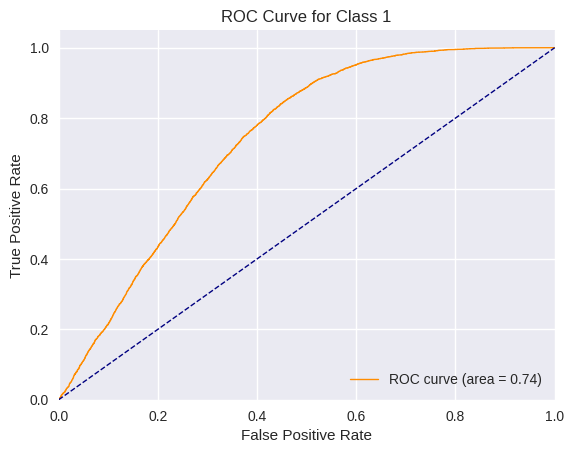

In [ ]:
plt.figure()
lw = 1
plt.style.use('seaborn')
plt.plot(fpr[lw], tpr[lw], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[lw])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class %d'%lw)
plt.legend(loc="lower right")
plt.show()

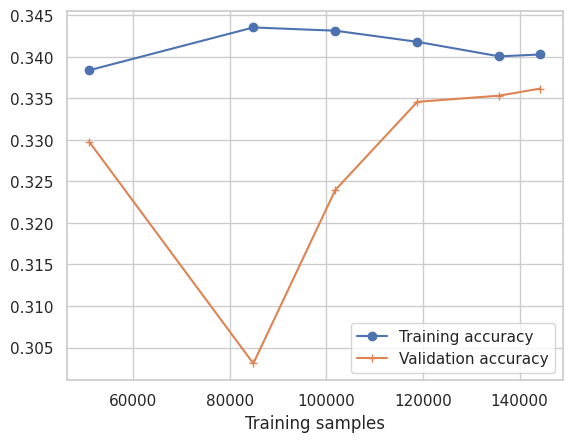

In [ ]:

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
  learning_curve(estimator=log_reg_pca, X=X_scale,
                 y=y,
                 train_sizes=[0.3, 0.5, 0.6, 0.7, 0.8, 0.85],
                 cv=10)
  
plt.plot(train_sizes,np.mean(train_scores, axis=1), \
          marker='o', label='Training accuracy')
plt.plot(train_sizes,np.mean(test_scores, axis=1), \
          marker='+', label='Validation accuracy')
plt.xlabel('Training samples')
plt.legend()

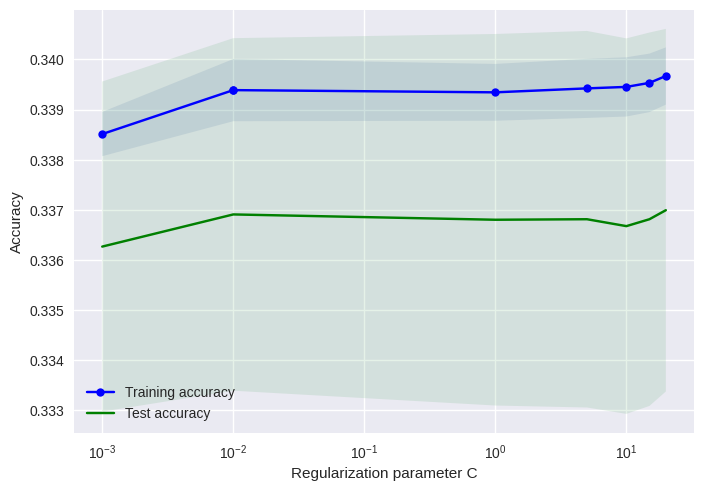

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.01, 1.0, 5.0, 10.0, 15.0, 20.0]

train_scores, test_scores = validation_curve(estimator=log_reg_pca, X=X_scale,
                                             y=y, param_name='C',
                                             param_range = param_range,
                                             cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(dpi=100)
plt.plot(param_range, train_mean, color='blue', marker='o',
         markersize=6, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, \
                 alpha=0.15)
plt.plot(param_range, test_mean, color='green', marker='+',
         markersize=6, label='Test accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, \
                 alpha=0.15)
plt.xscale('log')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Regularization parameter C')
plt.show()

# PART 3: Random Forest and Neural Network Model

In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np

# torch nn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable
# from collections import Counter

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# decision tree
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
wine_df.head(10)

,id,points,price,year,missing_year,sentiment,winery_point,country_Argentina,country_Australia,country_Austria,...,variety_Riesling,variety_Rosé,variety_Sangiovese,variety_Sauvignon Blanc,variety_Sparkling Blend,variety_Syrah,variety_Tempranillo,variety_White Blend,variety_Zinfandel,wine_class
0,0,96,235.0,0,1,0.9287,93.67,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,2,96,90.0,0,1,0.8070,93.67,0,0,0,...,0,0,0,1,0,0,0,0,0,7
2,3,96,65.0,0,1,0.2023,91.26,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,8,95,65.0,0,1,0.4927,92.46,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,9,95,60.0,0,1,0.4588,92.60,0,0,0,...,0,0,0,0,0,0,0,0,0,6
5,11,95,48.0,0,1,0.5719,93.38,0,0,0,...,0,0,0,0,0,0,0,0,0,6
6,12,95,48.0,0,1,0.5610,93.38,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,14,95,185.0,0,1,0.9072,91.77,0,0,0,...,0,0,0,0,0,0,0,0,0,7
8,15,95,90.0,0,1,0.5574,92.46,0,0,0,...,0,0,0,0,0,0,0,0,0,7
9,16,95,325.0,0,1,0.7964,91.69,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [ ]:
X = wine_df.drop(columns=['id', 'price', 'wine_class'])
y = wine_df['wine_class']
X_batch = X.to_numpy()
y_batch = y.to_numpy()
y_batch = y_batch[:, None]
#min max scale the features
sc = MinMaxScaler()
X_batch=sc.fit_transform(X_batch)

print("Features shape {}".format(X_batch.shape))
print("Label shape {}".format(y_batch.shape))

Features shape (188595, 45)
Label shape (188595, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_batch, y_batch, test_size=0.2, random_state=42)
#convert to tensors
X_train = torch.from_numpy(X_train)
X_train = X_train.to(torch.float32)
y_train = torch.from_numpy(y_train)
y_train = y_train.to(torch.float32)
X_test = torch.from_numpy(X_test)
X_test = X_test.to(torch.float32)
y_test = torch.from_numpy(y_test)
y_test = y_test.to(torch.float32)
# check the training tensor and testing tensor size 
print("Training Data Tensor Size: features x:{},  label y:{}".format(X_train.shape, y_train.shape))
print("Testing Data Tensor Size: features x:{},  label y:{}".format(X_test.shape, y_test.shape))

Training Data Tensor Size: features x:torch.Size([150876, 45]),  label y:torch.Size([150876, 1])
Testing Data Tensor Size: features x:torch.Size([37719, 45]),  label y:torch.Size([37719, 1])


In [ ]:
# batch_size
batch_size = 400

# Pytorch train and test sets
train = TensorDataset(X_train,y_train)
test = TensorDataset(X_test,y_test)


# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

In [ ]:
class FNN(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO
        self.flatten = nn.Flatten() 
        self.relu = nn.ReLU()

       #hidden and output layers
        self.input = nn.Linear(45, 20) 
        self.hidden = nn.Linear(20, 15) 
        self.output = nn.Linear(15, 1) #number of classes

    def forward(self, x):
        # TODO
        outputs = nn.Sequential(self.flatten,self.input, self.relu, self.hidden, self.relu, self.output)(x) #similar with pipline     
        # END TODO
        return outputs

In [ ]:
torch.manual_seed(42) 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.__version__)
print(device)

2.0.0+cu118
cpu


In [ ]:
%%time
# Sending the data to device (CPU or GPU)
# TODO
fnn = FNN().to(device)

criterion = nn.MSELoss()
# END TODO 
# optimizer = optim.SGD(fnn.parameters(), lr=1e-4) #lr - learning step(1e-4, 0.1, etc)
optimizer = optim.Adam(fnn.parameters(), lr=1e-2) #lr - learning step
epoch = 16
acc_LIST_FNN = []
loss_LIST_FNN = []

# Train the FNN
for epoch in range(epoch):
  running_loss = 0.0
  correct = 0
  total = 0
  for inputs, labels in train_loader:
      labels = labels.type(torch.FloatTensor) # Cast to Float
      inputs, labels = inputs.to(device), labels.to(device)
      # inputs, labels = inputs.to(torch.float32).to(device), labels.to(torch.float32).to(device)
      # print(inputs)
      # print(labels)
      # TODO
      outputs = fnn(inputs) # Feed the network the train data
      # print(labels)
      # print(outputs)
      # _, preds = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (outputs.to(torch.int) == labels.to(torch.int)).sum().item()
      optimizer.zero_grad() # We need to reset the optimizer tensor gradient every mini-batch
      loss = criterion(outputs, labels) # this is the average loss for one mini-batch of inputs
      loss.backward() # Do a back propagation
      optimizer.step()
      running_loss += loss.item()
      # print(running_loss)
      # print(correct)
      
  accuracy = 100 * correct / total# Calculate Training Acc
  acc_LIST_FNN.append(accuracy)
  loss_LIST_FNN.append(running_loss / len(train_loader) ) # get the avg loss for each epoch
  
  # END TODO 

  # print statistics
  print("The loss for Epoch {} is: {}, Accuracy = {}%, correct: {}, total: {}".format(epoch+1, running_loss/len(train_loader), accuracy, correct, total))

The loss for Epoch 1 is: 3.137500787853564, Accuracy = 22.589411172088337%, correct: 34082, total: 150876
The loss for Epoch 2 is: 2.2404702589625405, Accuracy = 26.63710596781463%, correct: 40189, total: 150876
The loss for Epoch 3 is: 2.209562872768079, Accuracy = 26.88432885283279%, correct: 40562, total: 150876
The loss for Epoch 4 is: 2.1881795503475048, Accuracy = 27.108353880007424%, correct: 40900, total: 150876
The loss for Epoch 5 is: 2.165512512600611, Accuracy = 27.256820170205998%, correct: 41124, total: 150876
The loss for Epoch 6 is: 2.1353930370517507, Accuracy = 27.3794374188075%, correct: 41309, total: 150876
The loss for Epoch 7 is: 2.121368383604383, Accuracy = 27.43378668575519%, correct: 41391, total: 150876
The loss for Epoch 8 is: 2.114198921849488, Accuracy = 27.387390970068136%, correct: 41321, total: 150876
The loss for Epoch 9 is: 2.1102095085477073, Accuracy = 27.425833134494553%, correct: 41379, total: 150876
The loss for Epoch 10 is: 2.1060557646095437, A

[Text(0.5, 1.0, 'Training Accuracy vs Epochs FNN')]

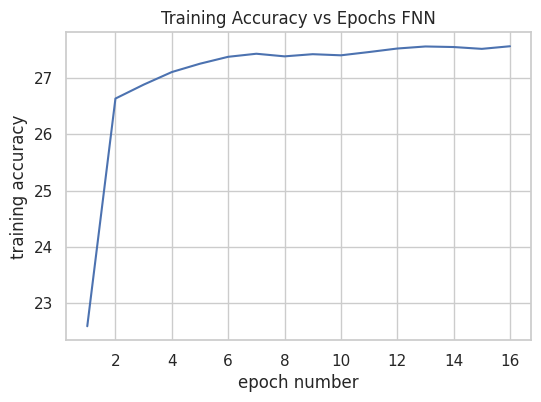

In [ ]:
# TODO
epoch = 16
fnn_acc_vs_epoch_data = {'epoch number':[e for e in range(1,epoch+1)], 'training accuracy':acc_LIST_FNN}
fnn_acc_vs_epoch_df = pd.DataFrame.from_dict(data=fnn_acc_vs_epoch_data)
fig, ax = plt.subplots(figsize=(6,4))
ax_train = sns.lineplot(data = fnn_acc_vs_epoch_df, x = 'epoch number', y = 'training accuracy')
ax_train.set(title = 'Training Accuracy vs Epochs FNN')
# END TODO 

In [ ]:
total = 0
correct = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        labels = labels.type(torch.FloatTensor) # Cast to Float
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = fnn(inputs) # Feed the network the train data
        total += labels.size(0)
        correct += (outputs.to(torch.int) == labels.to(torch.int)).sum().item()

test_acc_FNN = pd.Series([100 * correct / total], copy = False)
# TODO END
print('Test Accuracy: ' + str(test_acc_FNN.item()) +'%')

Test Accuracy: 26.38192953153583%


In [ ]:
# batch_size
batch_size = 400

# Pytorch train and test sets
train = TensorDataset(X_train,y_train)
test = TensorDataset(X_test,y_test)


# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

In [ ]:
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO
        self.deep_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(45,45),
            nn.ReLU(),
            nn.Linear(45,45),
            nn.ReLU(),
            nn.Linear(45,45),
            nn.ReLU(),
            nn.Linear(45,45),
            nn.ReLU(),
            nn.Linear(45,45),
            nn.ReLU(),
            nn.Linear(45,40),
            nn.ReLU(),
            nn.Linear(40,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8,4),
            nn.ReLU(),
            nn.Linear(4,1),
        )
        # END TODO

    def forward(self, x):
        # TODO
        outputs = self.deep_stack(x)
        # END TODO
        return outputs

In [ ]:
torch.manual_seed(42) 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.__version__)
print(device)

2.0.0+cu118
cpu


In [ ]:
%%time
# Sending the data to device (CPU or GPU)
# TODO
dnn = DNN().to(device)

criterion = nn.MSELoss()
# END TODO 
# optimizer = optim.SGD(dnn.parameters(), lr=1e-4) #lr - learning step(1e-4, 0.1, etc)
optimizer = optim.Adam(dnn.parameters(), lr=1e-2) #lr - learning step
epoch = 25
acc_LIST_DNN = []
loss_LIST_DNN = []

# Train the DNN
for epoch in range(epoch):
  running_loss = 0.0
  correct = 0
  total = 0
  for inputs, labels in train_loader:
      labels = labels.type(torch.FloatTensor) # Cast to Long
      inputs, labels = inputs.to(device), labels.to(device)
      # TODO
      outputs = dnn(inputs) # Feed the network the train data
      total += labels.size(0)
      correct += (outputs.to(torch.int) == labels.to(torch.int)).sum().item()
      optimizer.zero_grad() # We need to reset the optimizer tensor gradient every mini-batch
      loss = criterion(outputs, labels) # this is the average loss for one mini-batch of inputs
      loss.backward() # Do a back propagation
      optimizer.step()
      running_loss += loss.item()
      
  accuracy = 100 * correct / total# Calculate Training Acc
  acc_LIST_DNN.append(accuracy)
  loss_LIST_DNN.append(running_loss / len(train_loader) ) # get the avg loss for each epoch
  
  # END TODO 

  # print statistics
  # if epoch%10 == 0:
  print("The loss for Epoch {} is: {}, Accuracy = {}%, correct: {}, total: {}".format(epoch+1, running_loss/len(train_loader), accuracy, correct, total))

The loss for Epoch 1 is: 3.1858002496144127, Accuracy = 23.67639651104218%, correct: 35722, total: 150876
The loss for Epoch 2 is: 2.225756388808054, Accuracy = 26.77629311487579%, correct: 40399, total: 150876
The loss for Epoch 3 is: 2.1879075734072893, Accuracy = 27.29393674275564%, correct: 41180, total: 150876
The loss for Epoch 4 is: 2.1660881033019415, Accuracy = 27.372146663485246%, correct: 41298, total: 150876
The loss for Epoch 5 is: 2.1519349157494845, Accuracy = 27.42782152230971%, correct: 41382, total: 150876
The loss for Epoch 6 is: 2.1409897343822255, Accuracy = 27.492775524271586%, correct: 41480, total: 150876
The loss for Epoch 7 is: 2.1359999138842185, Accuracy = 27.567008669370875%, correct: 41592, total: 150876
The loss for Epoch 8 is: 2.1298530019780317, Accuracy = 27.62864869164082%, correct: 41685, total: 150876
The loss for Epoch 9 is: 2.1255325782235968, Accuracy = 27.747289164612%, correct: 41864, total: 150876
The loss for Epoch 10 is: 2.1238675451783275, 

[Text(0.5, 1.0, 'Training Accuracy vs Epochs FNN')]

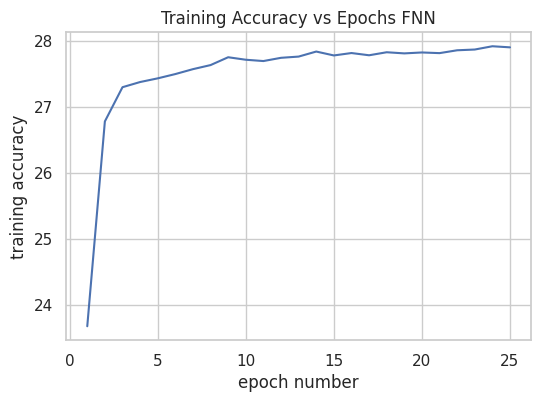

In [ ]:
# TODO
epoch = 25
dnn_acc_vs_epoch_data = {'epoch number':[e for e in range(1,epoch+1)], 'training accuracy':acc_LIST_DNN}
dnn_acc_vs_epoch_df = pd.DataFrame.from_dict(data=dnn_acc_vs_epoch_data)
fig, ax = plt.subplots(figsize=(6,4))
ax_train = sns.lineplot(data = dnn_acc_vs_epoch_df, x = 'epoch number', y = 'training accuracy')
ax_train.set(title = 'Training Accuracy vs Epochs FNN')
# END TODO 

In [ ]:
total = 0
correct = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        labels = labels.type(torch.FloatTensor) # Cast to Float
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = dnn(inputs) # Feed the network the train data
        total += labels.size(0)
        correct += (outputs.to(torch.int) == labels.to(torch.int)).sum().item()

test_acc_DNN = pd.Series([100 * correct / total], copy = False)
# TODO END
print('Test Accuracy: ' + str(test_acc_DNN.item()) +'%')

Test Accuracy: 25.91001882340465%


In [ ]:
wine_df

,id,points,price,year,winery_point,sentiment,country_Argentina,country_Australia,country_Austria,country_Bulgaria,...,variety_Riesling,variety_Rosé,variety_Sangiovese,variety_Sauvignon Blanc,variety_Sparkling Blend,variety_Syrah,variety_Tempranillo,variety_White Blend,variety_Zinfandel,wine_class
0,0,96,235.0,2012,93.67,0.9287,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,2,96,90.0,2012,93.67,0.8070,0,0,0,0,...,0,0,0,1,0,0,0,0,0,7
2,3,96,65.0,2012,91.26,0.2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,8,95,65.0,2012,92.46,0.4927,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,9,95,60.0,2012,92.60,0.4588,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188590,280893,90,20.0,2012,89.95,0.7326,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
188591,280895,90,28.0,2013,90.03,0.8564,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
188592,280896,90,28.0,2013,89.85,0.7331,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
188593,280897,90,75.0,2004,88.80,0.5267,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [ ]:

X = wine_df.drop(columns=['price', 'wine_class'])
y = wine_df['wine_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
#Fit Model
clf = tree.DecisionTreeClassifier(max_depth = 30,random_state = 1) #If depth is not set, it constructs a very deep tree
clf = clf.fit(X_train, y_train)

# Test Model
print('Training Accuracy = ',clf.score(X_train,y_train)) # training data
print('Testing Accuracy = ',clf.score(X_test,y_test)) # testing data

# dot_data = tree.export_graphviz(clf, out_file=None)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())


Training Accuracy =  0.9423014042436615
Testing Accuracy =  0.4803812402237599


In [ ]:
#Fit Model
X = wine_df.drop(columns=['price', 'wine_class'])
y = wine_df['wine_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
clf = RandomForestClassifier(max_depth = 30)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

# Test Model
print('Training Accuracy = ',clf.score(X_train,y_train)) # training data
print('Testing Accuracy = ',clf.score(X_test,y_test)) # testing data

Training Accuracy =  0.9986213844481561
Testing Accuracy =  0.48479546117341393
